In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

## 1.Loading Dataset

In [3]:
data = pd.read_csv("/content/insurance.csv")

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df = data.copy()

In [6]:
df.shape

(1338, 7)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe().T #statistic 

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
corr = df.corr()

In [12]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## 2.Data Visualization

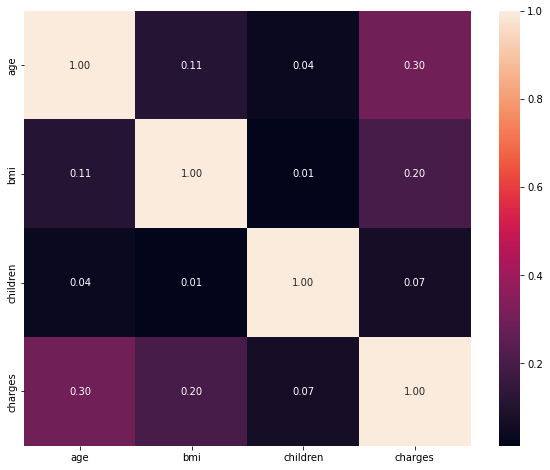

In [15]:
fig,ax = plt.subplots(figsize=(10,8))

ax = sb.heatmap(corr,annot=True,fmt='.2f')

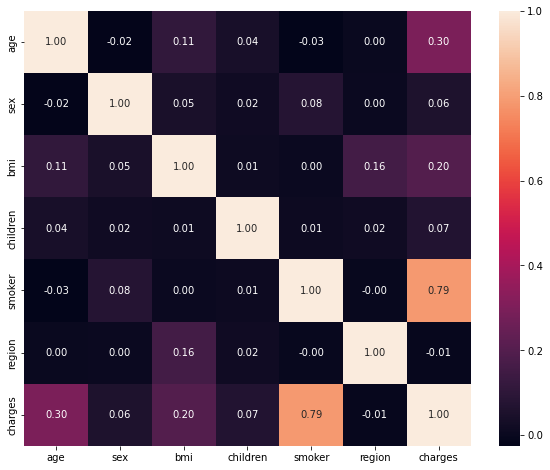

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

ax = sb.heatmap(corr,annot=True,fmt='.2f')

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

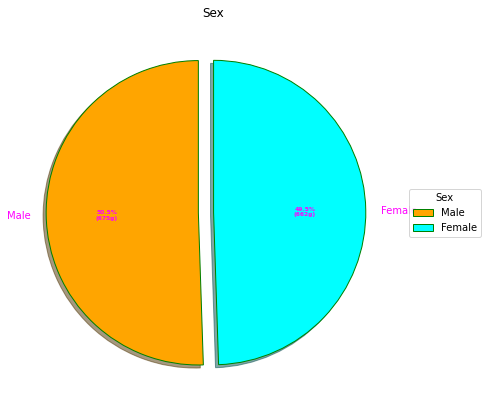

In [19]:
fig, ax = plt.subplots(figsize = (10,7))

sex = ["Male","Female"]

dt = list(df['sex'].value_counts().values)

explode = (0.1,0.0) #Creating explode data

colors = ("orange","cyan")

wp = {"linewidth":1, "edgecolor" : "green"}

def func(pct,allvalues):
  absolute = int(pct / 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d}g)".format(pct,absolute)

wedges,texts,autotexts = ax.pie(dt,autopct = lambda pct: func(pct,dt),explode = explode
                                ,labels = sex,
                                shadow = True,
                                colors = colors,
                                startangle = 90,
                                wedgeprops = wp,
                                textprops = dict(color = "magenta"))

ax.legend(wedges,sex,
          title="Sex",
          loc = "center left",
          bbox_to_anchor=(1,0,0.5,1))

plt.setp(autotexts,size = 6,weight = "bold")
ax.set_title("Sex")

plt.show()

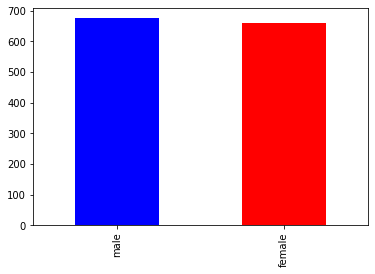

In [17]:
df['sex'].value_counts().plot(kind='bar',color=['blue','red'])

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

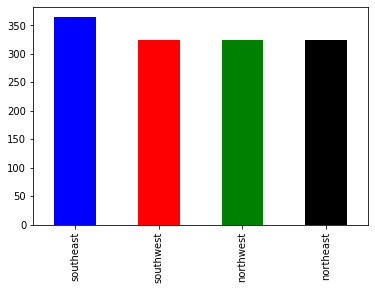

In [19]:
df['region'].value_counts().plot(kind='bar',color=['blue','red','green','black'])

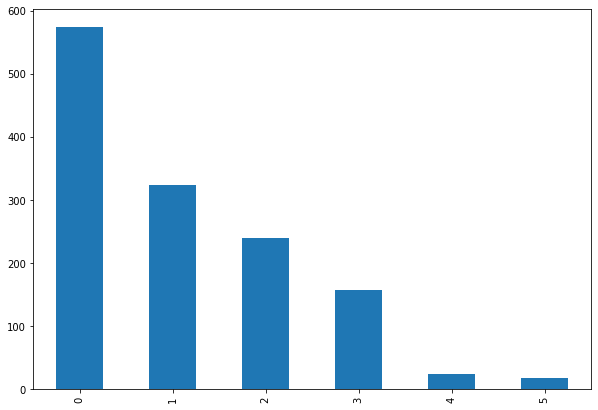

In [20]:
#Anlysis number of children
plt.figure(figsize=(10,7))
df['children'].value_counts().plot.bar()

## 3. Data Analysis

###  Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

<AxesSubplot:>

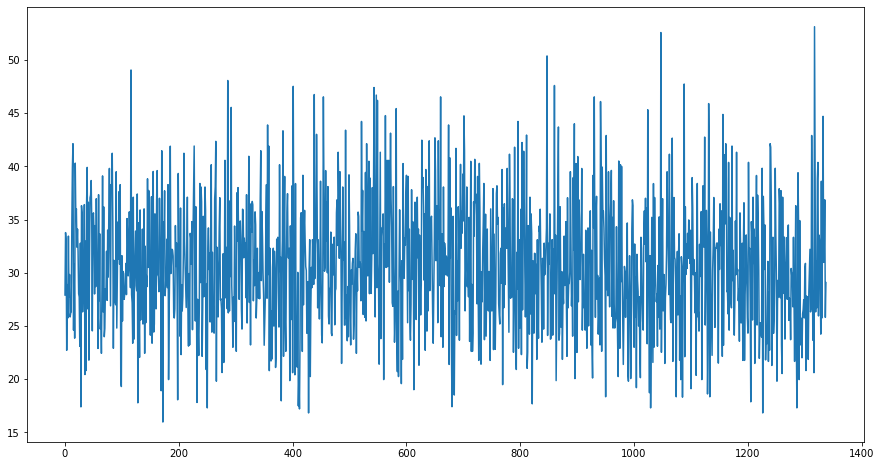

In [ ]:
data['bmi'].plot(figsize=(15,8))

In [ ]:
bmi_age = data.groupby('age').sum()['bmi']
bmi_age

age
18    2161.505
19    1944.590
20     888.350
21     789.200
22     870.455
23     880.725
24     815.995
25     831.430
26     824.010
27     821.340
28     825.500
29     793.345
30     825.055
31     807.795
32     821.540
33     810.240
34     787.125
35     784.870
36     734.355
37     780.415
38     724.915
39     747.755
40     813.755
41     850.685
42     818.860
43     815.520
44     832.795
45     863.590
46     908.885
47     889.265
48     925.845
49     848.790
50     902.835
51     920.085
52     955.145
53     850.105
54     874.560
55     830.700
56     821.625
57     801.955
58     817.955
59     764.300
60     697.655
61     748.610
62     743.880
63     734.240
64     725.475
Name: bmi, dtype: float64

<AxesSubplot:xlabel='age'>

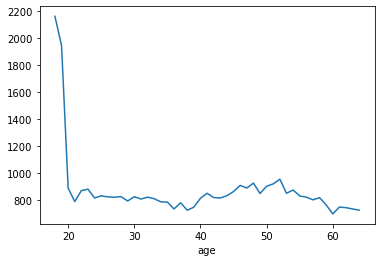

In [ ]:
bmi_age.plot()

In [ ]:
bmi_sex=data.groupby('sex').sum()['bmi']
bmi_sex

sex
female    20110.070
male      20917.555
Name: bmi, dtype: float64

<BarContainer object of 2 artists>

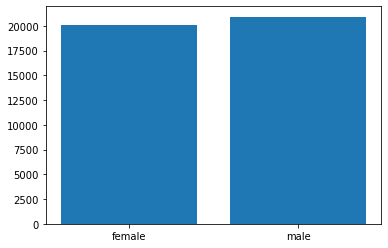

In [ ]:
plt.bar(['female','male'],bmi_sex)

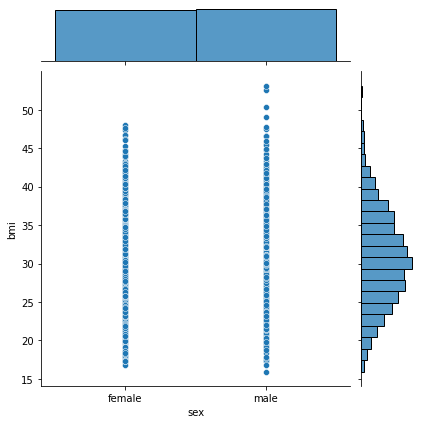

In [ ]:
sb.jointplot(x='sex',y='bmi',data=data,kind='scatter')

### “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


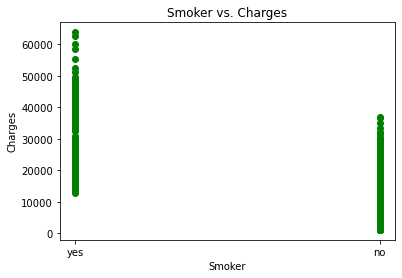

In [ ]:
plt.scatter(x=df["smoker"], y=df["charges"], color="green")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Smoker vs. Charges")
plt.show()

In [ ]:
data_corr = data[['smoker','charges']]
data_corr

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500


In [ ]:
data['smoker']=data['smoker'].astype('category').cat.codes
#data['charges']=data['charges'].astype('category').cat.codes

data['charges'].corr(data['smoker'])

0.6635092219309593

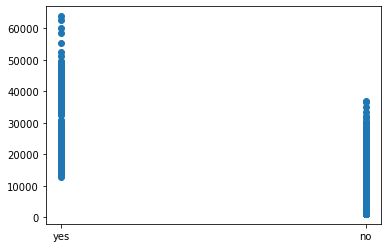

In [ ]:
plt.scatter(data_corr['smoker'],data_corr['charges'])

In [ ]:
smoker_charges =data.groupby('smoker').sum()['charges']
smoker_charges

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

<BarContainer object of 2 artists>

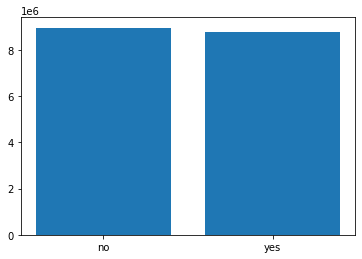

In [ ]:
plt.bar(['no','yes'],smoker_charges)

In [ ]:
yes_smoker = data[data['smoker'] == 'yes']['charges']
yes_smoker

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [ ]:
no_smoker = data[data['smoker'] == 'no']['charges']
no_smoker

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

###  “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz

In [ ]:
data = pd.read_csv("insurance.csv")

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data_corr_reg = data[['smoker','region']]
data_corr_reg

,smoker,region
0,yes,southwest
1,no,southeast
2,no,southeast
3,no,northwest
4,no,northwest
...,...,...
1333,no,northwest
1334,no,northeast
1335,no,southeast
1336,no,southwest


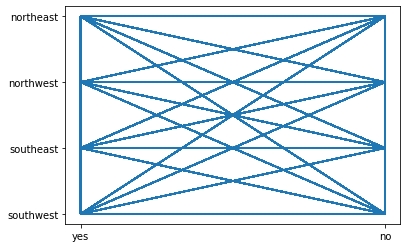

In [ ]:
plt.plot(data_corr_reg['smoker'],data_corr_reg['region'])

In [ ]:
smoker=data['smoker'].astype('category').cat.codes
region=data['region'].astype('category').cat.codes

smoker.corr(region)

-0.0021806820409347115

In [ ]:
yes_smk_rg = data[data['smoker'] == 'yes']['region']
yes_smk_rg

0       southwest
11      southeast
14      southeast
19      southwest
23      northeast
          ...    
1313    southwest
1314    northwest
1321    northeast
1323    southeast
1337    northwest
Name: region, Length: 274, dtype: object

In [ ]:
no_smk_rg = data[data['smoker'] == 'no']['region']
no_smk_rg

1       southeast
2       southeast
3       northwest
4       northwest
5       southeast
          ...    
1332    southwest
1333    northwest
1334    northeast
1335    southeast
1336    southwest
Name: region, Length: 1064, dtype: object

###  “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

In [ ]:
data.groupby(by='sex').sum()['bmi'].sort_values(ascending=False)

sex
male      20917.555
female    20110.070
Name: bmi, dtype: float64

In [ ]:
data_bmi_sex = data[['bmi','sex']]
data_bmi_sex

,bmi,sex
0,27.900,female
1,33.770,male
2,33.000,male
3,22.705,male
4,28.880,male
...,...,...
1333,30.970,male
1334,31.920,female
1335,36.850,female
1336,25.800,female


In [ ]:
sex=data['sex'].astype('category').cat.codes

sex.corr(data['bmi'])

0.04637115064629451

In [ ]:
sex

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Length: 1338, dtype: int8

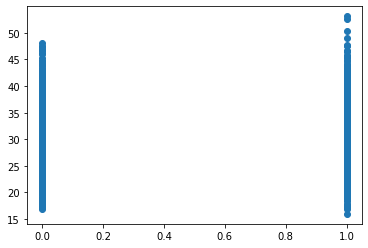

In [ ]:
plt.scatter(sex,data['bmi'])

In [ ]:
male_bmi = data[data['sex'] == 'male']['bmi']
male_bmi

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64

In [ ]:
female_bmi = data[data['sex'] == 'female']['bmi']
female_bmi

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64

###  En çok “children”’a sahip “region”’ı bulunuz

In [ ]:
data.groupby(by='region').sum().sort_values(by='children',ascending=False)

,age,bmi,children,charges
region,,,,
southeast,14174,12141.580,382,5.363690e+06
northwest,12739,9489.930,373,4.035712e+06
southwest,12823,9943.900,371,4.012755e+06
northeast,12723,9452.215,339,4.343669e+06


In [ ]:
children = data.groupby(by='region').sum()['children'].sort_values(ascending=False)
children

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

In [ ]:
x = np.array(["southeast", "northwest", "southwest", "northeast"])

<BarContainer object of 4 artists>

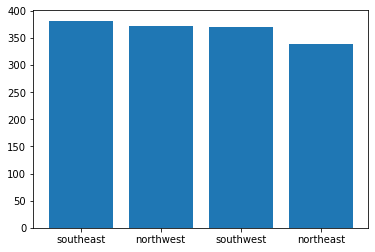

In [ ]:
plt.bar(x,children)

### “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

### “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

In [ ]:
outliers = []

def outlier_bul(data):
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers  

In [ ]:
outlier = outlier_bul(data['bmi'])
outlier

[49.06, 50.38, 52.58, 53.13]

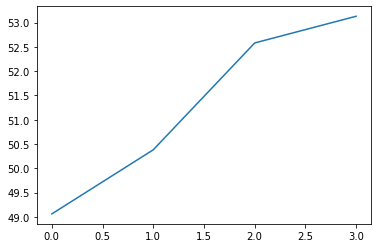

In [ ]:
plt.plot(outlier)

### “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz

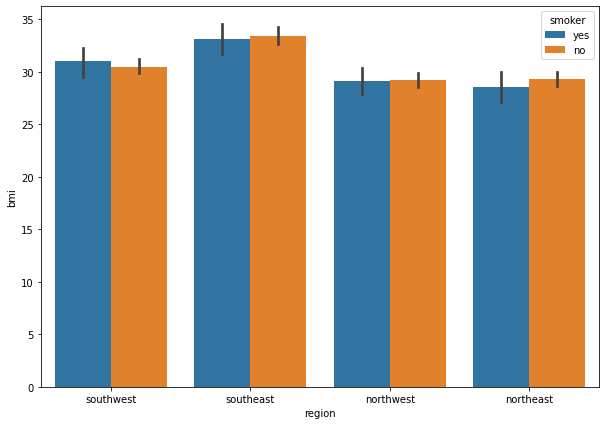

In [21]:
#which state has the most smoker

plt.figure(figsize=(10,7))

sb.barplot(x='region',y='bmi',hue='smoker',data = df)

## 4.Data Preprocessing

### 1.Label Encoding

In [22]:
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [23]:
label_encoding('smoker')
label_encoding('sex')

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### 2.One Hot Encoding

In [25]:
one_hot = pd.get_dummies(df['region'])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [26]:
df = pd.concat([df,one_hot],axis = 1)
df.drop('region',axis=1,inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## 5.Splitting Dataset

In [27]:
X = df.drop('charges',axis = 1)
y = df['charges']

## 6.Feature Scaling

In [28]:
#Normalization

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [30]:
print(f"Shape of X Train: {X_train.shape}\nShape of y Train: {y_train.shape}\nShape of X Test: {X_test.shape}\nShape of y Test: {y_test.shape}")

Shape of X Train: (1070, 9)
Shape of y Train: (1070,)
Shape of X Test: (268, 9)
Shape of y Test: (268,)


## 7.Model Selection

In [31]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
SVM = SVR()

In [32]:
#cross validation
linreg_scores = cross_val_score(linreg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [33]:
linreg_scores

array([-36935397.24633981, -43307871.90469339, -27392943.33594101,
       -36545076.53517248, -34064321.21101744, -37545462.85261907,
       -53003844.65025207, -39666927.56171686, -38357145.09175086,
       -32042446.75311643])

In [34]:
DecTree_scores = cross_val_score(DecTree,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
DecTree_scores

array([-39892073.74252999, -37838711.97255022, -54870902.77156003,
       -51016953.82442778, -48744560.51095054, -41730065.21642313,
       -50000305.3531521 , -51244648.34752914, -48079339.18084915,
       -31458272.37212058])

In [35]:
RandForest_scores = cross_val_score(RandForest,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
RandForest_scores

array([-23576316.80722647, -27319285.32337032, -15244036.02602362,
       -19749181.61025266, -27915129.07826902, -23502425.42713682,
       -31150510.26484506, -29819971.99442452, -26344120.82936569,
       -21756120.19377216])

In [36]:
SVM_scores = cross_val_score(SVM,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
SVM_scores

array([-1.56939674e+08, -1.55688887e+08, -1.64428208e+08, -2.10106259e+08,
       -1.69069136e+08, -1.08552023e+08, -1.51800872e+08, -1.47702857e+08,
       -1.67329025e+08, -1.50282422e+08])

In [37]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores : {scores}
  Mean : {scores.mean()}
  Standart Deviation : {scores.std()}
  """)

In [38]:
score_display(linreg_scores)


  RMSE Scores : [6077.44989665 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7280.37393616 6298.16858791 6193.3145481  5660.60480453]
  Mean : 6133.376271799343
  Standart Deviation : 517.5318567882914
  


## 8.Parameter Tuning

In [51]:
params = {'n_estimators' : [3,10,20,50],
          'n_jobs' : [2,3,4,10]}

In [52]:
grid_s = GridSearchCV(RandForest,params,cv=5,scoring='neg_mean_squared_error')

In [53]:
grid_s.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [54]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 3}

In [55]:
for mean_score,params in zip((grid_s.cv_results_['mean_test_score']),
                             (grid_s.cv_results_['params'])):
  print(np.sqrt(-mean_score), "        " ,params)
    

5488.624036512804          {'n_estimators': 3, 'n_jobs': 2}
5690.133049404046          {'n_estimators': 3, 'n_jobs': 3}
5561.904399549107          {'n_estimators': 3, 'n_jobs': 4}
5829.28548339512          {'n_estimators': 3, 'n_jobs': 10}
5180.36980053849          {'n_estimators': 10, 'n_jobs': 2}
5090.329275904547          {'n_estimators': 10, 'n_jobs': 3}
5107.103309956505          {'n_estimators': 10, 'n_jobs': 4}
5100.220633144082          {'n_estimators': 10, 'n_jobs': 10}
5001.165317687799          {'n_estimators': 20, 'n_jobs': 2}
5016.588826966802          {'n_estimators': 20, 'n_jobs': 3}
5051.859131657939          {'n_estimators': 20, 'n_jobs': 4}
5001.3584771204105          {'n_estimators': 20, 'n_jobs': 10}
4988.328352710346          {'n_estimators': 50, 'n_jobs': 2}
4925.539282629256          {'n_estimators': 50, 'n_jobs': 3}
4964.690349438134          {'n_estimators': 50, 'n_jobs': 4}
4974.434900151813          {'n_estimators': 50, 'n_jobs': 10}


## 9.Predicting

In [56]:
predictions = grid_s.best_estimator_.predict(X_test)

In [57]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [58]:
comparison = pd.DataFrame({'Y Test' : y_test[0:10].values,
                           'Predictions' : predictions[0:10]})

comparison

,Y Test,Predictions
0,9095.06825,9867.617571
1,5272.17580,4937.721996
2,29330.98315,28189.170499
3,9301.89355,12786.829724
4,33750.29180,34927.376429
5,4536.25900,9693.411425
6,2117.33885,2028.456610
7,14210.53595,14269.593807
8,3732.62510,7139.560216
9,10264.44210,11791.372932


## 10.Evaluation

In [59]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test,preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test,preds)
  mae =  mean_absolute_error(y_test,preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Absolute Error: {rmse} \nR Squared Value: {r_squared}")

In [60]:
regression_evaluation(predictions)

Mean Absolute Error: 2597.2127837780467 
Mean Squared Error: 21697977.58558896 
Root Mean Absolute Error: 4658.108799243419 
R Squared Value: 0.8602373276928275
